In [1]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
from torch import optim
import matplotlib.pyplot as plt
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

transformer = transforms.Compose(
    [transforms.Resize((64,64)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data',train = True,download=True,transform=transformer)
testset = torchvision.datasets.CIFAR10(root='./data',train = False,download=True,transform=transformer)

train_loader = torch.utils.data.DataLoader(trainset,batch_size=25,shuffle=True,num_workers=2)
test_loader = torch.utils.data.DataLoader(testset,batch_size=25,shuffle=True,num_workers=2)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')




class ConvNet(nn.Module):
      def __init__(self):
        """CNN Builder."""
        super(ConvNet, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096*4, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


      def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x



cuda
Files already downloaded and verified
Files already downloaded and verified


In [2]:
net=ConvNet().to(device)
optimizer=optim.SGD(net.parameters(),lr=0.001,weight_decay=0.0001)
optimizer.zero_grad()
print(list(net.parameters())[0].size())
criterion = nn.CrossEntropyLoss()
print(len(train_loader))
print(len(test_loader))


torch.Size([32, 3, 3, 3])
2000
400


In [3]:
for epoch in range(30):

  running_loss = 0.0
  for i,(images,labels) in enumerate(train_loader):

    if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

    optimizer.zero_grad()

    outputs = net(images)
    loss = criterion(outputs,labels)
    running_loss += loss
    loss.backward()
    optimizer.step()

  print(running_loss/len(train_loader))
    
test_accuracy=0.0
for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        outputs=net(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
        if i%999 == 0:
          print(labels.data,prediction)
    

test_accuracy=100*test_accuracy/(25*len(test_loader))
    
print(test_accuracy)


tensor(1.9831, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.5104, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.3251, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.1893, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.0848, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.9970, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.9211, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.8573, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.8079, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.7629, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.7238, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.6887, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.6561, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.6267, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5974, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5707, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5477, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5215, device='cuda:0', grad_fn=<DivBack

ground truth :        bird      ship     truck     truck      bird      ship       dog      deer     horse       dog       car     truck     truck       cat      frog      deer       dog      frog     horse       dog      deer     horse      ship      bird       car
predicted :        bird      ship     truck     truck      bird      ship     horse      deer       dog       dog      bird     truck     truck       cat      frog      deer      deer      frog      deer       dog      deer     horse      ship     plane       car


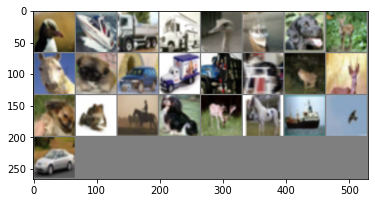

In [9]:
def imageshow(img):
  img= img /2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images 
imageshow(torchvision.utils.make_grid(images))

print ("ground truth : " ,''.join('%10s'% classes[labels[j]] for j in range(25)))

if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
outputs=net(images)

_,predicted = torch.max(outputs.data,1)

print ("predicted : " ,''.join('%10s'% classes[predicted[j]] for j in range(25)))